In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as pl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate


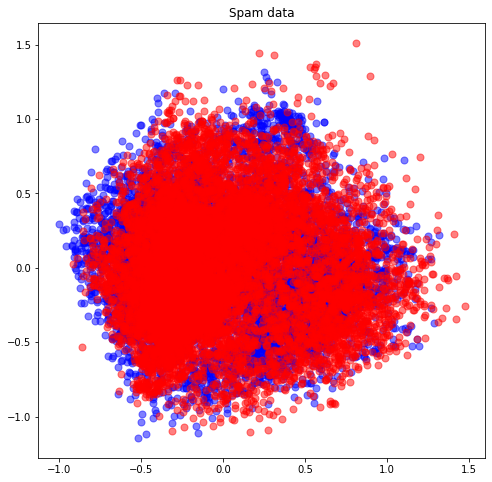

             precision    recall  f1-score   support

        0.0    0.61371   0.85883   0.71587      2033
        1.0    0.96020   0.86302   0.90902      8023

avg / total    0.89015   0.86217   0.86997     10056
final score    0.78695   0.86092   0.81244     10056



In [2]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA
from tqdm import tqdm
__author__ = 'gulinvladimir'

def main():
       
    args_train = 'Lecture1/spam.train.txt'
    args_test = 'Lecture1/spam.test.txt'
    args_features_percent = 0.9 
    args_trees = 10
    train_data = np.loadtxt(args_train)
    test_data  = np.loadtxt(args_test)

    total_data = np.concatenate(([train_data, test_data]), axis=0)

    visualize_data(total_data[0::, 1::], len(train_data[:,0]), len(test_data[:,0]))

    number_of_features = len(train_data[0, :])

    use_features_in_tree = (int)(args_features_percent * number_of_features)

    # Create the random forest object which will include all the parameters
    # for the fit
    forest = RandomForestClassifier(n_estimators = args_trees, max_features=use_features_in_tree)

    # Fit the training data to the Survived labels and create the decision trees
    forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

    # Take the same decision trees and run it on the test data
    prediction = forest.predict(test_data[0::, 1::])

    print(classification_report(test_data[0::, 0], prediction))


def visualize_data(total_data, train_size, test_size):
    ''' Visualization of total spam data
    :param total_data: Train and test data
    :param train_size: Size of train set
    :param test_size: Size of test set
    :return:
    '''
    pca = PCA(n_components=2)
    projection = pca.fit_transform(total_data)

    fig = pl.figure(figsize=(8, 8))

    pl.rcParams['legend.fontsize'] = 10
    pl.plot(projection[0:train_size, 0], projection[0:train_size, 1],
            'o', markersize=7, color='blue', alpha=0.5, label='Train')
    pl.plot(projection[train_size:train_size+test_size, 0], projection[train_size:train_size+test_size, 1],
            'o', markersize=7, color='red', alpha=0.5, label='Test')
    pl.title('Spam data')
    pl.show()


def classification_report(y_true, y_pred):
    ''' Computes clasification metrics

    :param y_true - original class label
    :param y_pred - predicted class label
    :return presicion, recall for each class; micro_f1 measure, macro_f1 measure
    '''
    last_line_heading = 'avg / total'
    final_line_heading = 'final score'

    labels = unique_labels(y_true, y_pred)

    width = len(last_line_heading)
    target_names = ['{0}'.format(l) for l in labels]

    headers = ["precision", "recall", "f1-score", "support"]
    fmt = '%% %ds' % width  # first column: class name
    fmt += '  '
    fmt += ' '.join(['% 9s' for _ in headers])
    fmt += '\n'

    headers = [""] + headers
    report = fmt % tuple(headers)
    report += '\n'

    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred,
                                                  labels=labels,
                                                  average=None)

    f1_macro = 0
    precision_macro = 0
    recall_macro = 0

    for i, label in enumerate(labels):
        values = [target_names[i]]
        f1_macro += f1[i]
        precision_macro += p[i]
        recall_macro += r[i]
        for v in (p[i], r[i], f1[i]):
            values += ["{0:0.5f}".format(v)]
        values += ["{0}".format(s[i])]
        report += fmt % tuple(values)

    report += '\n'

    # compute averages
    values = [last_line_heading]
    for v in (np.average(p, weights=s),
              np.average(r, weights=s),
              np.average(f1, weights=s)):
        values += ["{0:0.5f}".format(v)]
    values += ['{0}'.format(np.sum(s))]
    report += fmt % tuple(values)

    values = [final_line_heading]
    for v in (precision_macro, recall_macro, f1_macro):
        values += ["{0:0.5f}".format(v / labels.size)]
    values += ['{0}'.format(np.sum(s))]
    report += fmt % tuple(values)

    return report

def parse_args():
    parser = argparse.ArgumentParser(description='Random Forest Tutorial')
    parser.add_argument("-tr", "--train", action="store", type=str, help="Train file name")
    parser.add_argument("-te", "--test", action="store", type=str, help="Test file name")
    parser.add_argument("-t", "--trees", action="store", type=int, help="Number of trees in random forest", default=10)
    parser.add_argument("-fp", "--features_percent", action="store", type=float, help="Percent of features in each tree", default=0.9)
    return parser.parse_args()

if __name__ == "__main__":
    main()

In [3]:
train_data = np.loadtxt('Lecture1/spam.train.txt')
test_data  = np.loadtxt('Lecture1/spam.test.txt')

total_data = np.concatenate(([train_data, test_data]), axis=0)

In [4]:
def find_params(train_data, number_of_features):
    from sklearn.model_selection import cross_validate
    from sklearn.utils import shuffle

    shuffled_train_x, shuffled_train_y = shuffle(train_data[0::, 1::],  train_data[0::, 0])
    fig = pl.figure(figsize= (14,5))
    ax = fig.add_subplot(121)
    ax.set_ylim(0.96, 0.98)
    ax.set_xlim(0, 410)
    ax.set_ylabel('Score')
    ax.set_xlabel('Trees count')
    best_score = 0
    scores = np.array([])
    best_number = 0
    for number_of_trees in np.arange(10, 400, 25):
        forest = RandomForestClassifier(n_estimators = number_of_trees)
        current_score = cross_validate(forest, shuffled_train_x, shuffled_train_y, cv = 3)['test_score'].mean()
        scores = np.append(scores, current_score)
        if current_score > best_score:
            best_score = current_score
            best_number = number_of_trees
            
    ax.plot(np.arange(10, 400, 25), scores, color = 'red')  
    ax2 = fig.add_subplot(122)
    ax2.set_ylim(0.96, 0.98)
    ax2.set_xlim(0, 1)
    ax2.set_ylabel('Score')
    ax2.set_xlabel('Feature percent')
    best_score = 0
    best_percent = 0
    scores = np.array([])

    for features_percent in np.arange(0.1, 1.1, 0.1):
        forest = RandomForestClassifier(n_estimators = best_number, max_features = (int)(features_percent * (number_of_features - 1)))
        current_score = cross_validate(forest, shuffled_train_x,shuffled_train_y , cv = 3)['test_score'].mean()
        scores = np.append(scores, current_score)
        print(current_score)
        if current_score > best_score:
            best_percent = features_percent
            best_score = current_score
            
    ax2.plot(np.arange(0.1, 1.1, 0.1),scores, color = 'red')

    pl.show()
    return best_number, best_percent

0.9726492883026939
0.97194450704662
0.9705345868077542
0.9708167139462146
0.9685606507764458
0.9685609488820445
0.9665873109563347
0.9627806813263077
0.9595379482464832
0.9564363383570088


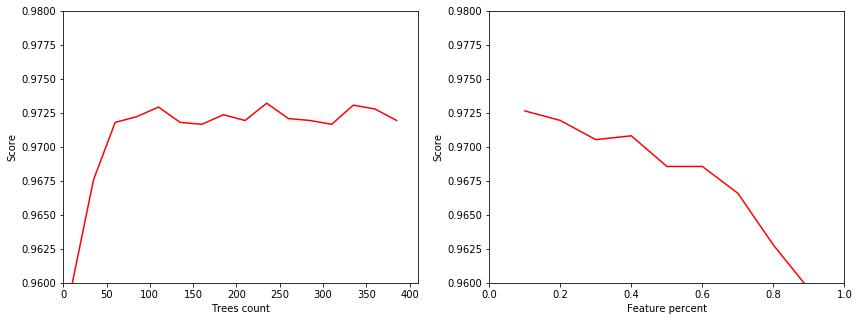

(235, 0.1)

In [5]:
number_of_features = len(train_data[0, :])
find_params(train_data = train_data, number_of_features = number_of_features)

In [24]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from scipy.stats import wilcoxon, rankdata
import warnings
warnings.filterwarnings("ignore")

In [25]:
kfold = model_selection.KFold(n_splits=10, shuffle = True)
forest = RandomForestClassifier()


In [26]:
classifiers = [svm.SVC(), LogisticRegression( max_iter=1000), KNeighborsClassifier(), SGDClassifier()]
names = ['Random forest', 'SVM', 'Logistic regression', 'KNN', 'SGD']

In [27]:
def compare_classifiers(classifier, train_arr, test_arr, forest_f1, k):
    class_f1 = np.array([])
    for i in range(len(train_arr)):
        classifier.fit( train_data[train_arr[i], 1::], train_data[train_arr[i], 0])
        pred = classifier.predict( test_data[test_arr[i], 1::])
        class_f1 = np.append(class_f1, f1_score(pred,test_data[test_arr[i], 0]))
    other_mean = np.mean(class_f1)
    means[k] += other_mean
    return wilcoxon(forest_f1,class_f1, alternative = 'greater')[1]

In [28]:
stats = dict()
means = np.zeros(5)
for i in range(1, 5):
    stats[i] = np.array([])
for _ in range(2):
    train_arr = []
    test_arr = []
    for train_index, test_index in kfold.split(train_data[:, 1::], train_data[:, 0]):
        train_arr.append(train_index)
        test_arr.append(test_index)
    forest_f1 = np.array([])
    for i in range(len(train_arr)):
        forest.fit( train_data[train_arr[i], 1::], train_data[train_arr[i], 0])
        pred = forest.predict( test_data[test_arr[i], 1::])
        forest_f1 =  np.append(forest_f1, f1_score(pred,test_data[test_arr[i], 0]))
    means[0] += np.mean(forest_f1)
    for k, сlassifier in enumerate(classifiers):
        stats[k + 1] = np.append(stats[k + 1], compare_classifiers(сlassifier, train_arr, test_arr, forest_f1, k + 1))

<BarContainer object of 5 artists>

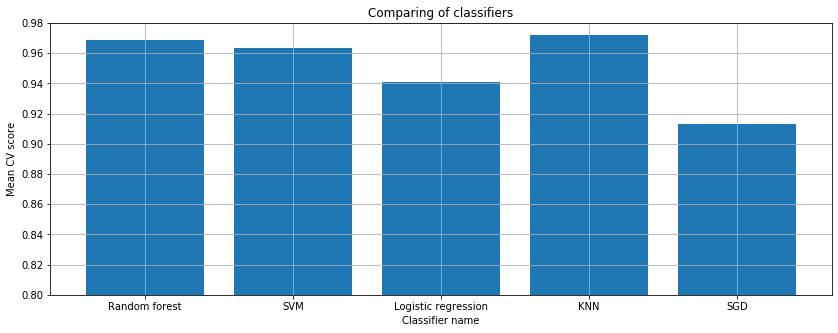

In [29]:
fig, axes = pl.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(14)
axes.grid()
axes.set_ylim(0.80, 0.98)
axes.set_title('Comparing of classifiers')
axes.set_xlabel('Classifier name')
axes.set_ylabel('Mean CV score')
axes.bar(names,  means / 2)

In [30]:
for i in range(1, 5):
    print('Compare Random forest with ', names[i])
    print ('Median value of wilcoxon criteria of pessimistic hypotesis is ', np.median(stats[i]))

Compare Random forest with  SVM
Median value of wilcoxon criteria of pessimistic hypotesis is  0.023998512138280782
Compare Random forest with  Logistic regression
Median value of wilcoxon criteria of pessimistic hypotesis is  0.002531016063133932
Compare Random forest with  KNN
Median value of wilcoxon criteria of pessimistic hypotesis is  0.9465310488152656
Compare Random forest with  SGD
Median value of wilcoxon criteria of pessimistic hypotesis is  0.025486202705720162


In [33]:
forest = RandomForestClassifier(n_estimators = 10, max_features=0.9)
forest.fit( train_data[0::, 1::], train_data[0::, 0])
print(classification_report( test_data[0::, 0],forest.predict(test_data[0::, 1::])))
svc = svm.SVC()
svc.fit( train_data[0::, 1::], train_data[0::, 0])
print(classification_report(test_data[0::, 0], svc.predict(test_data[0::, 1::])))
logis = LogisticRegression()
logis.fit( train_data[0::, 1::], train_data[0::, 0])
print(classification_report(test_data[0::, 0], logis.predict(test_data[0::, 1::])))
knn = KNeighborsClassifier()
knn.fit( train_data[0::, 1::], train_data[0::, 0])
print(classification_report(test_data[0::, 0], knn.predict(test_data[0::, 1::])))
sgd = SGDClassifier()
sgd.fit( train_data[0::, 1::], train_data[0::, 0])
print(classification_report( test_data[0::, 0], sgd.predict(test_data[0::, 1::])))

             precision    recall  f1-score   support

        0.0    0.61937   0.84604   0.71518      2033
        1.0    0.95700   0.86825   0.91047      8023

avg / total    0.88874   0.86376   0.87099     10056
final score    0.78819   0.85715   0.81282     10056

             precision    recall  f1-score   support

        0.0    0.76980   0.97541   0.86049      2033
        1.0    0.99332   0.92609   0.95852      8023

avg / total    0.94813   0.93606   0.93870     10056
final score    0.88156   0.95075   0.90951     10056

             precision    recall  f1-score   support

        0.0    0.68540   0.95376   0.79761      2033
        1.0    0.98699   0.88907   0.93548      8023

avg / total    0.92602   0.90215   0.90760     10056
final score    0.83620   0.92142   0.86654     10056

             precision    recall  f1-score   support

        0.0    0.80429   0.93999   0.86686      2033
        1.0    0.98411   0.94204   0.96262      8023

avg / total    0.94776   0.94163   

Итак, можно сделать выводы, что Random forest лучше большинства классификаторов при уровне значимости 5%

In [97]:
np.unique(train_data[0::, 0], return_counts = True)

(array([0., 1.]), array([2970, 4123]))

In [99]:
np.unique(test_data[0::,0], return_counts = True)

(array([0., 1.]), array([2033, 8023]))

Можно заметить, что датасет несбалансирован, значит, если неправильно классифицировать относительно немного спама, это может драматически сказаться на f1-score неспама.